# Autoregressive Model (AR)

- A linear model, where current period values are a sum of past outcomes multiplied by a numeric factor
$$x_t = C + \varphi x_{t-1} + \epsilon_t$$

Where, 
- $x_{t-1}$: The values of X during the previous period
- $\varphi$: Any numeric constant by which we multiply the lagged variable. range $-1 < \varphi < 1$
- $\epsilon_t$: Residual, The difference between our prediction for period $t$ and the correct value

More lag values

$$x_t = C + \varphi_1 x_{t-1} + \varphi_2 x_{t-2} + \epsilon_t$$

In [ ]:
import sys


In [ ]:
sys.path.append('..')

In [3]:
import utils

In [4]:
df, df_test = utils.get_index_2018_market_value_splits(market_name='ftse')
df['rw'] = utils.get_random_walk_data()
df.head()

../utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,market_value,wn,rw
date,,,
1994-01-07,3445.98,5656.111684,1122.139662
1994-01-10,3440.58,6651.600549,1080.347860
1994-01-11,3413.77,4621.706788,1082.095245
1994-01-12,3372.02,5349.725859,1083.639265
1994-01-13,3360.01,6251.862940,1067.146255


In [5]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
DATA_DIR = '../data'

In [6]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
# warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

## ACF

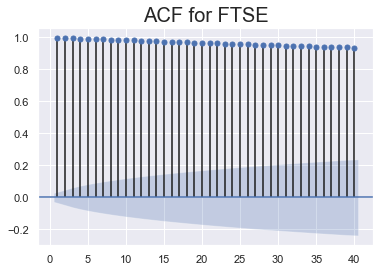

In [7]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for FTSE", size=20)
plt.show()

- Effects are barely deteriorating over time
- The two time series ae similar in the way they behvae and the way past values affect preset ones
- The more lags we include the beter our model will fit the data set we feed it
- Coefficients might predict the data set `too` well

## PACF

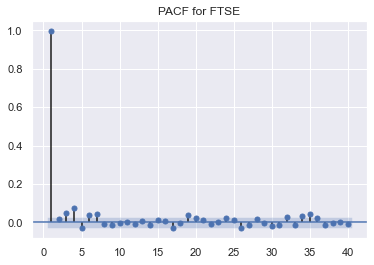

In [8]:
sgt.plot_pacf(df.market_value, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF for FTSE")
plt.show()

- Coefficient values will be extremely close to 0
- Their impact on the model is minimal, so they are not relevant to us

## ARMA

In [9]:
from statsmodels.tsa.arima_model import ARMA

In [10]:
# Order, (# of past values wish to incorporate into the model, Not taking any of the residual values into consideration)
model_ar = ARMA(df.market_value, order=(1, 0))

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
results_ar = model_ar.fit()

In [12]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 17 Dec 2020   AIC                          55251.196
Time:                        14:57:01   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5055.8541    485.798     10.407      0.000    4103.707    6008.001
ar.L1.market_value     0.9985      0.001   1298.620      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

- coef: `const-coef` is $C$ and `ar.L1.market_value-coef` is $\varphi$
- std err: How far away on average the model predictions are from the true value
- z-value: test statistics
- p-Value

In [13]:
model_ar_2 = ARMA(df.market_value, order=(2, 0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Thu, 17 Dec 2020   AIC                          55251.742
Time:                        14:57:02   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    495.674     10.268      0.000    4118.138    6061.144
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4636           +0.0000j           58.4636            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
model_ar_3 = ARMA(df.market_value, order=(3, 0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Thu, 17 Dec 2020   AIC                          55241.742
Time:                        14:57:02   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    520.379      9.781      0.000    4069.718    6109.565
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [15]:
model_ar_4 = ARMA(df.market_value, order=(4, 0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 17 Dec 2020   AIC                          55217.130
Time:                        14:57:03   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    559.958      9.089      0.000    3992.145    6187.138
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test

In [16]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    
    return p

## Comparing Higher - Lag AR Models

In [17]:
x = LLR_test(model_ar_2, model_ar_3)
type(x)

numpy.float64

In [18]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [19]:
print(results_ar_4.summary())
print(f'LLR_test p-value: {LLR_test(model_ar_3, model_ar_4)}')

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 17 Dec 2020   AIC                          55217.130
Time:                        14:57:04   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    559.958      9.089      0.000    3992.145    6187.138
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [20]:
def ARMA_LLR_test(model_ar_x_1, x):
    model_ar_x = ARMA(df.market_value, order=(x, 0))
    results_ar_x = model_ar_x.fit()
    llr = None
    if(model_ar_x_1 != None):
        llr = LLR_test(model_ar_x_1, model_ar_x)
        
    return (model_ar_x, llr)

In [ ]:
import numpy as np
models = [None]
llrs = []
model_ar_x_1 = None
for i in np.arange(1, 10):
    (model_ar_x_1, llr_x) = ARMA_LLR_test(model_ar_x_1, i)
    models.append(model_ar_x_1)
    llrs.append(llr_x)
    print(f'LLR test, Lags: {i}, p-value: {llr_x}')

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


LLR test, Lags: 1, p-value: None
LLR test, Lags: 2, p-value: 0.228
LLR test, Lags: 3, p-value: 0.001
LLR test, Lags: 4, p-value: 0.0
LLR test, Lags: 5, p-value: 0.035


In [ ]:
llrs

In [ ]:
models
result_8 = models[8].fit()

In [ ]:
print(result_8.summary())
print(f'LLR test, Lags: 7, p-value: {llrs[8]}')

We choose AR(7) over the AR(8) because
- The AR(8) fails the LLR test
- The AR(8) does not provide significantly higher log-likelihood
- The AR(8) has higher information criteria

In [ ]:
for i in np.arange(1, 9):
    print(f'LLR test: {LLR_test(models[i], models[i+1], DF=6)}')